<a href="https://colab.research.google.com/github/NMThanh123/AI_Report/blob/main/AI_Report_Recognition_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict name based on face

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [ ]:
def save_data(root_folder):

    dest_size = (224, 224)
    print("Bắt đầu xử lý ảnh...")

    images = []
    labels = []

    # Lặp qua các thư mục con con trong thư mục gốc
    for folder in os.listdir(root_folder):
        if folder!='.DS_Store':
            print("Folder =",folder)
            # Lặp qua các file trong từng thư mục con  chứa các ảnh
            for file in os.listdir(root_folder+'/'+folder):
                if file!='.DS_Store':
                    # print("File=", file)
                    images.append(cv.imread(root_folder + '/' + folder +"/" + file))
                    labels.append(folder)

    images = np.array(images)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    print(labels)

    file = open('/content/drive/MyDrive/Colab Notebooks/Report/Data_report/pix_face.data', 'wb')
    # dump information to that file
    pickle.dump((images,labels), file)
    # close the file
    file.close()

save_data('/content/drive/MyDrive/Colab Notebooks/Report/Data_report/data_face')

Bắt đầu xử lý ảnh...
Folder = train
Folder = train1
Folder = train2
Folder = train3
Folder = train4
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [ ]:
def load_data():
    file = open('/content/drive/MyDrive/Colab Notebooks/Report/Data_report/pix_face.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(381, 40, 30, 3)
(381, 5)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=1)
X = X_test
print(X_train.shape, X_test.shape)

(304, 40, 30, 3) (77, 40, 30, 3)


In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1,1), padding = 'same', activation = 'relu', input_shape=(40, 30, 3)))
model.add(Conv2D(32, (3, 3),strides=(1,1), padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 40, 30, 32)        896       
                                                                 
 conv2d_33 (Conv2D)          (None, 40, 30, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 20, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 20, 15, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 20, 15, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 10, 7, 64)        0         
 g2D)                                                 

In [ ]:
aug = ImageDataGenerator(rotation_range=20,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
h = model.fit_generator(aug.flow(X_train, y_train, batch_size=10), epochs=15, validation_data=aug.flow(X_test,y_test, batch_size=10))

Epoch 1/15


<ipython-input-27-f6ced6899e2f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(aug.flow(X_train, y_train, batch_size=10), epochs=15, validation_data=aug.flow(X_test,y_test, batch_size=10))


31/31 [==============================] - 5s 21ms/step - loss: 1.6031 - accuracy: 0.2763 - val_loss: 1.5789 - val_accuracy: 0.3377
Epoch 2/15
31/31 [==============================] - 0s 13ms/step - loss: 1.4518 - accuracy: 0.3487 - val_loss: 1.2323 - val_accuracy: 0.3896
Epoch 3/15
31/31 [==============================] - 0s 14ms/step - loss: 1.2095 - accuracy: 0.4605 - val_loss: 0.9981 - val_accuracy: 0.5844
Epoch 4/15
31/31 [==============================] - 0s 13ms/step - loss: 1.1044 - accuracy: 0.5000 - val_loss: 0.9937 - val_accuracy: 0.6364
Epoch 5/15
31/31 [==============================] - 0s 14ms/step - loss: 0.9782 - accuracy: 0.5789 - val_loss: 0.8661 - val_accuracy: 0.6623
Epoch 6/15
31/31 [==============================] - 0s 13ms/step - loss: 0.8487 - accuracy: 0.6645 - val_loss: 0.9730 - val_accuracy: 0.5844
Epoch 7/15
31/31 [==============================] - 0s 13ms/step - loss: 0.7513 - accuracy: 0.7138 - val_loss: 0.8312 - val_accuracy: 0.7013
Epoch 8/15
31/31 [======

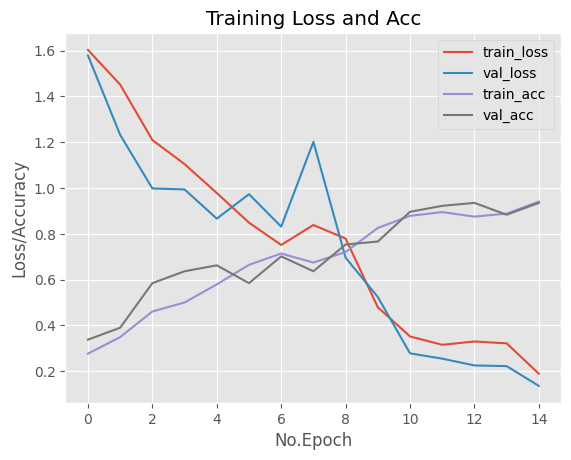

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 15), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 15), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Acc")
plt.xlabel("No.Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()

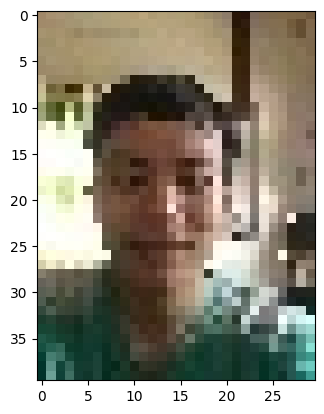

1/1 [==============================] - 0s 33ms/step
[[3.4928125e-06 9.9950409e-01 4.8196636e-04 2.1742244e-08 1.0540845e-05]]
This picture is:  Nhan [3.4928125e-06 9.9950409e-01 4.8196636e-04 2.1742244e-08 1.0540845e-05]
0.9995041


In [ ]:
class_name = ['Thanh','Nhan','Tan','Dat', 'thanh']
image = X[8]

# test = cv.resize(cv.imread('/content/drive/MyDrive/Colab Notebooks/Report/Data_report/2.jpg'), dsize=(40, 30))
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[8]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))